# ★ 실무 실습) 배포 받은 "Loan-Status-Prediction"를 통해 자신만의 코드를 작성 해보자

1. 대출자가 상환할 가능성이 있는지를 분류하는 모델을 만들 것이다.
2. 하나의 포트폴리오가 될 수 있도록 시각화와 통계를 자유롭게 작성해보자.
3. 이제까지 배운 분류 방법들을 통해 적용해보자.
4. 모든 기법을 다 쓰는 것보다는 필요 할 것 같다는 코드만 작성해보기


In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('Loan Status Prediction.csv', encoding = 'cp949')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.isnull().sum() # dropna 중요한 변수들인 것으로 판단 -> drop으로 행을 제거 해야할듯

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


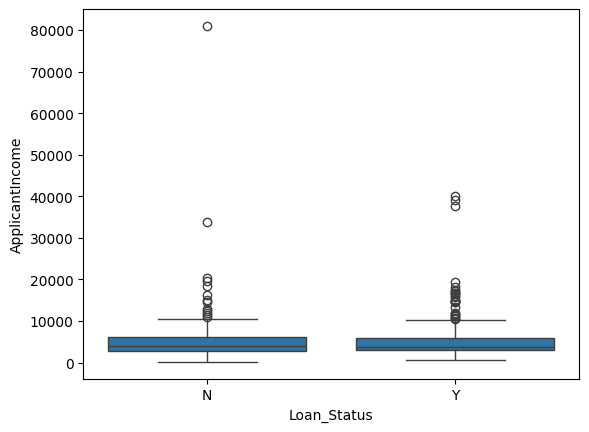

In [12]:
# 대출승인여부에 따른 신청인 소득
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.show()

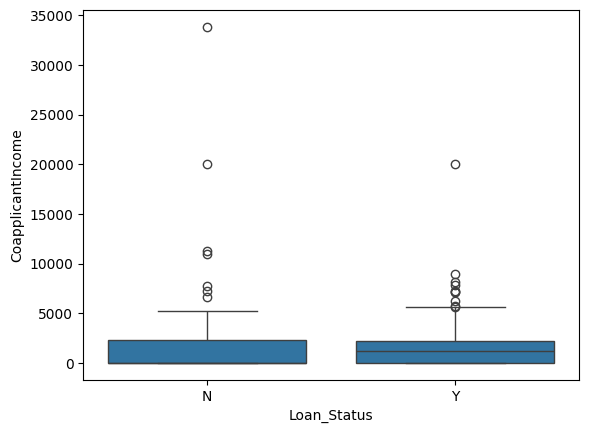

In [13]:
# 대출승인여부에 따른 공동 신청인 소득
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.show()

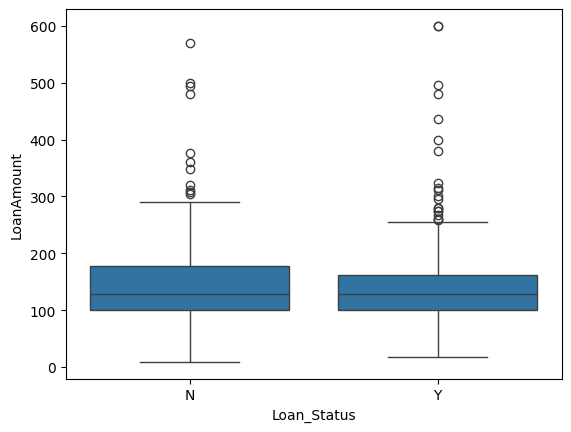

In [14]:
# 대출승인여부에 따른 대출금액(천단위)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()

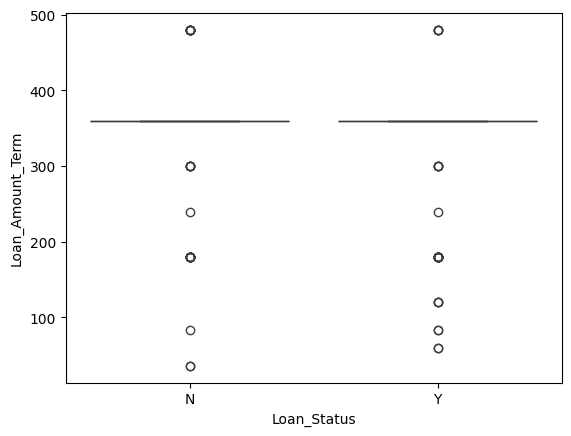

In [15]:
# 대출승인여부에 따른 대출기간(개월단위)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=df)
plt.show()

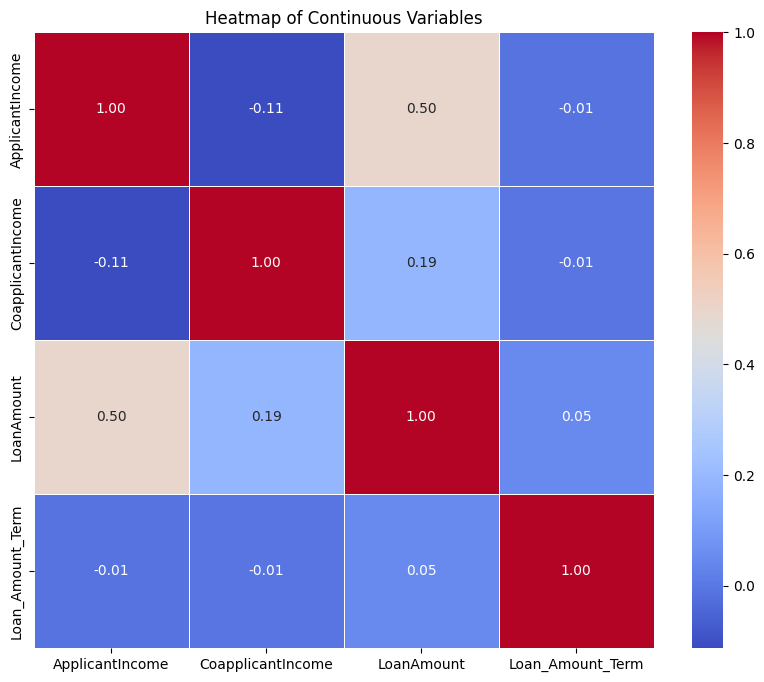

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 연속형 변수들만 선택
continuous_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# 선택한 연속형 변수들의 상관관계 계산
corr_matrix = df[continuous_vars].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 히트맵의 크기 설정
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Heatmap of Continuous Variables')
plt.show()

In [17]:
df[continuous_vars].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000
std,5668.251251,2617.692267,80.508164,65.212401
min,150.000000,0.000000,9.000000,36.000000
25%,2898.750000,0.000000,100.000000,360.000000
50%,3859.000000,1084.500000,128.000000,360.000000
75%,5852.500000,2253.250000,170.000000,360.000000
max,81000.000000,33837.000000,600.000000,480.000000


In [18]:
crosstab_df = pd.crosstab(df['Gender'], df['Loan_Status'])
crosstab_df.div(crosstab_df.sum(axis=1), axis=0) * 100

Loan_Status,N,Y
Gender,,
Female,37.209302,62.790698
Male,29.441624,70.558376


In [19]:
crosstab_df = pd.crosstab(df['Married'], df['Loan_Status'])
crosstab_df.div(crosstab_df.sum(axis=1), axis=0) * 100

Loan_Status,N,Y
Married,,
No,37.869822,62.130178
Yes,27.009646,72.990354


In [20]:
crosstab_df = pd.crosstab(df['Dependents'], df['Loan_Status']) # 별로 차이가 나 보이지 않음 -> 모델링에서 제외
crosstab_df.div(crosstab_df.sum(axis=1), axis=0) * 100

Loan_Status,N,Y
Dependents,,
0,31.751825,68.248175
1,35.000000,65.000000
2,23.529412,76.470588
3+,31.707317,68.292683


In [21]:
crosstab_df = pd.crosstab(df['Education'], df['Loan_Status'])
crosstab_df.div(crosstab_df.sum(axis=1), axis=0) * 100

Loan_Status,N,Y
Education,,
Graduate,29.242820,70.757180
Not Graduate,37.113402,62.886598


In [22]:
crosstab_df = pd.crosstab(df['Self_Employed'], df['Loan_Status']) # 별로 차이가 나 보이지 않음 -> 모델링에서 넣지 않을 것임
crosstab_df.div(crosstab_df.sum(axis=1), axis=0) * 100

Loan_Status,N,Y
Self_Employed,,
No,30.193237,69.806763
Yes,34.848485,65.151515


In [23]:
crosstab_df = pd.crosstab(df['Credit_History'], df['Loan_Status']) # 꼭 필요한 변수
crosstab_df.div(crosstab_df.sum(axis=1), axis=0) * 100

Loan_Status,N,Y
Credit_History,,
0.0,90.000000,10.000000
1.0,20.731707,79.268293


In [24]:
crosstab_df = pd.crosstab(df['Property_Area'], df['Loan_Status'])
crosstab_df.div(crosstab_df.sum(axis=1), axis=0) * 100

Loan_Status,N,Y
Property_Area,,
Rural,38.848921,61.151079
Semiurban,21.989529,78.010471
Urban,34.666667,65.333333


## 모델링

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.metrics import accuracy_score

In [26]:
# 범주형 변수 인코딩
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Married'] = LabelEncoder().fit_transform(df['Married'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Self_Employed'] = LabelEncoder().fit_transform(df['Self_Employed'])
df['Credit_History'] = LabelEncoder().fit_transform(df['Credit_History'])
df['Property_Area'] = LabelEncoder().fit_transform(df['Property_Area'])
df['Loan_Status'] = LabelEncoder().fit_transform(df['Loan_Status'])

In [27]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
# 부양가족수와 자영업 여부는 차이가 없어 보였기 때문에 모델링에 넣지 않을 것임
selected_vars = ['Gender', 'Married', 'Education',
                'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [29]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

X = df[selected_vars].values
y = df['Loan_Status'].values

kmeans = KMeans(n_clusters=3, random_state=7777)
cluster_labels = kmeans.fit_predict(X)

# 원래 데이터에 클러스터 라벨 추가
X_extended = pd.concat([pd.DataFrame(X), pd.DataFrame(cluster_labels, columns=['cluster'])], axis=1).values

# 데이터 분할 (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X_extended, y, test_size=0.2, random_state=42, stratify=y)

# 데이터 정규화 (RobustScaler 사용)
scaler = RobustScaler()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 데이터를 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 텐서 데이터셋 및 DataLoader 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # 미니배치 사이즈로 자르기
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [31]:
class MultiLayerRegression(nn.Module):
    def __init__(self):
        super(MultiLayerRegression, self).__init__()
        self.linear1 = nn.Linear(X_train.shape[1], 100)  # input_layer = X_train.shape[1], hidden_layer1 = 100
        self.activate1 = nn.ReLU()
        self.linear2 = nn.Linear(100, 100)  # hidden_layer2 = 100, hidden_layer3 = 100
        self.activate2 = nn.ReLU()
        self.linear3 = nn.Linear(100, len(set(y)))  # hidden_layer3 = 100, output_layer = len(set(y))
    def forward(self, x):
        out1 = self.linear1(x)
        out2 = self.activate1(out1)
        out3 = self.linear2(out2)
        out4 = self.activate2(out3)
        out5 = self.linear3(out4)
        return out5

In [32]:
model = MultiLayerRegression()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
patience = 5
best_loss = float('inf')
early_stop_counter = 0
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()
    val_loss /= len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')
    if val_loss < best_loss:
        best_loss = val_loss
        early_stop_counter = 0
    else:
        early_stop_counter += 1
    if early_stop_counter >= patience:
        print("Early stopping triggered")
        break
model.eval()
with torch.no_grad():
    y_pred = []
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

Epoch 1/50, Loss: 0.6893, Val Loss: 0.6442
Epoch 2/50, Loss: 0.7988, Val Loss: 0.6318
Epoch 3/50, Loss: 0.6958, Val Loss: 0.7102
Epoch 4/50, Loss: 0.7695, Val Loss: 0.6113
Epoch 5/50, Loss: 0.6995, Val Loss: 0.5947
Epoch 6/50, Loss: 0.7393, Val Loss: 0.5857
Epoch 7/50, Loss: 0.6820, Val Loss: 0.6896
Epoch 8/50, Loss: 0.6176, Val Loss: 0.5526
Epoch 9/50, Loss: 0.6785, Val Loss: 0.6672
Epoch 10/50, Loss: 0.6153, Val Loss: 0.5530
Epoch 11/50, Loss: 0.6162, Val Loss: 0.5187
Epoch 12/50, Loss: 0.5453, Val Loss: 0.5012
Epoch 13/50, Loss: 0.5391, Val Loss: 0.5217
Epoch 14/50, Loss: 0.5079, Val Loss: 0.5564
Epoch 15/50, Loss: 0.8131, Val Loss: 1.0514
Epoch 16/50, Loss: 0.7551, Val Loss: 0.5530
Epoch 17/50, Loss: 0.5596, Val Loss: 0.4844
Epoch 18/50, Loss: 0.5202, Val Loss: 0.4891
Epoch 19/50, Loss: 0.5061, Val Loss: 0.4642
Epoch 20/50, Loss: 0.5189, Val Loss: 0.4677
Epoch 21/50, Loss: 0.4721, Val Loss: 0.4556
Epoch 22/50, Loss: 0.4531, Val Loss: 0.4574
Epoch 23/50, Loss: 0.4852, Val Loss: 0.45

###  위 코드에서 어떤 기법들을 썼었고 왜 그것들을 썼는지 서술 하시오.